In [222]:
import pandas as pd
import numpy as np

In [223]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier

In [224]:
data=pd.read_csv('Weather Data.csv')

In [225]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


### lets plane

In [226]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [227]:
data.duplicated().sum()

0

In [228]:
data.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [229]:
data.columns=['Date_Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather']

In [230]:
data.drop(['Date_Time'], axis=1, inplace=True)

In [231]:
data.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,-1.8,-3.9,86,4,8.0,101.24,Fog
1,-1.8,-3.7,87,4,8.0,101.24,Fog
2,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,-1.5,-3.3,88,7,4.8,101.23,Fog


In [232]:
data['Weather'].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [233]:
# we need weather coloumns to cluster algorithm 

In [234]:
data.Weather=data.Weather.apply(lambda x: 'Cloudy' if 'Cloudy' in x else x)
data.Weather=data.Weather.apply(lambda x: 'Fog' if 'Fog' in x else x)
data.Weather=data.Weather.apply(lambda x: 'Rain' if 'Rain' in x else x)
data.Weather=data.Weather.apply(lambda x: 'Snow' if 'Snow' in x else x)
data.Weather=data.Weather.apply(lambda x: 'Clear' if 'Clear' in x else x)


In [235]:
data['Weather'].unique()

array(['Fog', 'Cloudy', 'Rain', 'Clear', 'Snow', 'Freezing Drizzle',
       'Haze', 'Drizzle', 'Freezing Drizzle,Haze', 'Thunderstorms'],
      dtype=object)

In [236]:
data.Weather=data.Weather.apply(lambda x: 'Others' if x in ['Freezing Drizzle',
       'Haze', 'Drizzle', 'Freezing Drizzle,Haze', 'Thunderstorms'] else x)

In [237]:
data['Weather'].unique()

array(['Fog', 'Cloudy', 'Rain', 'Clear', 'Snow', 'Others'], dtype=object)

In [238]:
data.Weather.value_counts()

Weather
Cloudy    3797
Clear     3432
Rain       560
Snow       500
Fog        426
Others      69
Name: count, dtype: int64

In [239]:
data.shape

(8784, 7)

In [240]:
from sklearn.preprocessing import LabelEncoder

In [241]:
le = LabelEncoder()
data['Weather'] = le.fit_transform(data['Weather'])

In [242]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Temp_C            8784 non-null   float64
 1   Dew Point Temp_C  8784 non-null   float64
 2   Rel Hum_%         8784 non-null   int64  
 3   Wind Speed_km/h   8784 non-null   int64  
 4   Visibility_km     8784 non-null   float64
 5   Press_kPa         8784 non-null   float64
 6   Weather           8784 non-null   int32  
dtypes: float64(4), int32(1), int64(2)
memory usage: 446.2 KB


In [243]:
data.corr()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
Temp_C,1.000000,0.932714,-0.220182,-0.061876,0.273455,-0.236389,-0.215899
Dew Point Temp_C,0.932714,1.000000,0.139494,-0.095685,0.050813,-0.320616,-0.095256
Rel Hum_%,-0.220182,0.139494,1.000000,-0.092743,-0.633683,-0.231424,0.374310
Wind Speed_km/h,-0.061876,-0.095685,-0.092743,1.000000,0.004883,-0.356613,0.223175
Visibility_km,0.273455,0.050813,-0.633683,0.004883,1.000000,0.231847,-0.480715
Press_kPa,-0.236389,-0.320616,-0.231424,-0.356613,0.231847,1.000000,-0.348290
Weather,-0.215899,-0.095256,0.374310,0.223175,-0.480715,-0.348290,1.000000


C:\Users\daniy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\daniy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\daniy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\daniy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

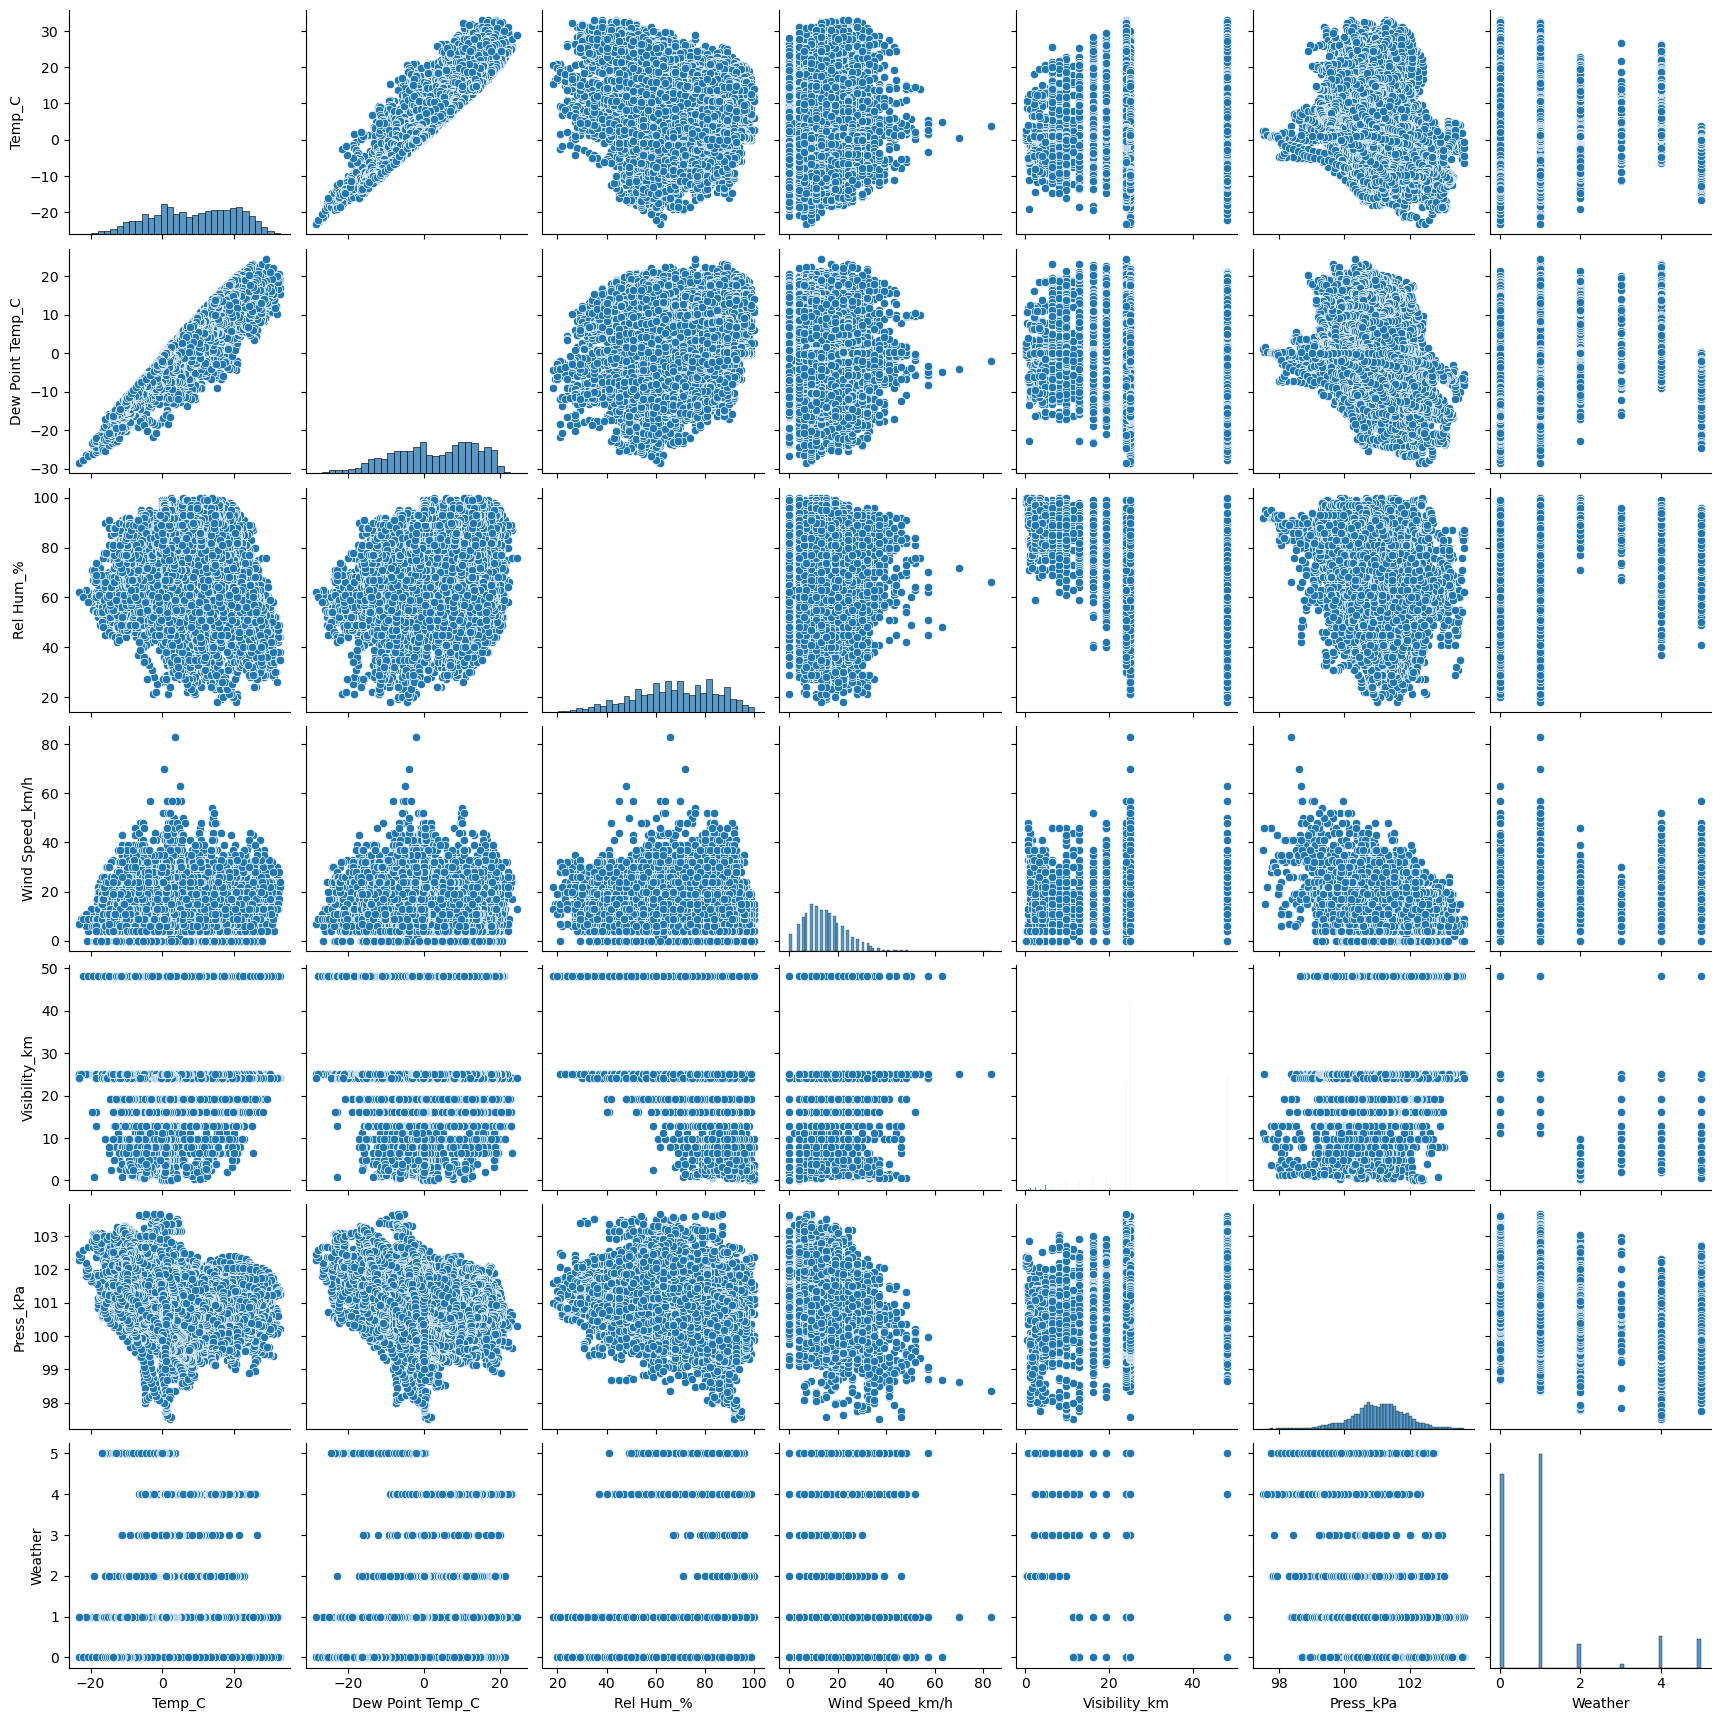

In [244]:
import seaborn as sns
sns.pairplot(data)

In [245]:
X= data.drop(columns=['Weather'])
y=data['Weather']

In [246]:
#step1 => trian /test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% data for testing
    random_state=42,    # ensures reproducibility       # shuffles the data before splitting
)

In [247]:
y_test = y_test.astype(int)
y_test_pred = y_test_pred.astype(int)

In [248]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def decisionTreeClassifier(depths):
    train = []
    test = []
    for depth in depths:
        dtc =DecisionTreeClassifier(max_depth=depth)
        dtc.fit(X_train,y_train)
        train_accuracy_score=accuracy_score(y_train,dtc.predict(X_train))
        test_accuracy_score= accuracy_score(y_test,dtc.predict(X_test))
        train.append(train_accuracy_score)
        test.append(test_accuracy_score)

    return list(zip(train,test))

decisionTreeClassifier([1,2,3,4,5,6,7,8,9,10,11])

[(0.47900953465205637, 0.4877632327831531),
 (0.5471751814430056, 0.5287421741605008),
 (0.5939945922868934, 0.5845190665907798),
 (0.60438309378113, 0.5919180421172453),
 (0.6218870072577202, 0.6129766647694934),
 (0.6504909634267824, 0.6289129197495731),
 (0.670271808737726, 0.6323278315310188),
 (0.6978796072292586, 0.6476949345475241),
 (0.7257720222000854, 0.649402390438247),
 (0.762629856268678, 0.6568013659647126),
 (0.7973530667425643, 0.6556630620375641)]

In [249]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.57      0.76      0.65       665
           1       0.58      0.48      0.53       772
           2       0.32      0.71      0.44        85
           3       0.02      0.10      0.04        10
           4       0.00      0.00      0.00       109
           5       0.00      0.00      0.00       116

    accuracy                           0.53      1757
   macro avg       0.25      0.34      0.28      1757
weighted avg       0.49      0.53      0.50      1757



C:\Users\daniy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\daniy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\daniy\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
